<a href="https://colab.research.google.com/github/K-ra-droid/Internship/blob/main/Prediction_for_Credit_card_Approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction for Credit card Approval**

*Krupa Maru (MIP-ML-04)*

In [ ]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("train_data.csv")


                 ID  Children count        Income           Age  \
count  2.916500e+04    29165.000000  2.916500e+04  29165.000000   
mean   5.078232e+06        0.430790  1.868904e+05 -15979.477490   
std    4.182400e+04        0.741882  1.014096e+05   4202.997485   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042047e+06        0.000000  1.215000e+05 -19444.000000   
50%    5.074666e+06        0.000000  1.575000e+05 -15565.000000   
75%    5.114629e+06        1.000000  2.250000e+05 -12475.000000   
max    5.150485e+06       19.000000  1.575000e+06  -7705.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       29165.000000             29165.0      29165.000000  29165.000000   
mean        59257.761255                 1.0          0.224310      0.294977   
std        137655.883458                 0.0          0.417134      0.456040   
min        -15713.000000                 1.0          0.000000      0.000000

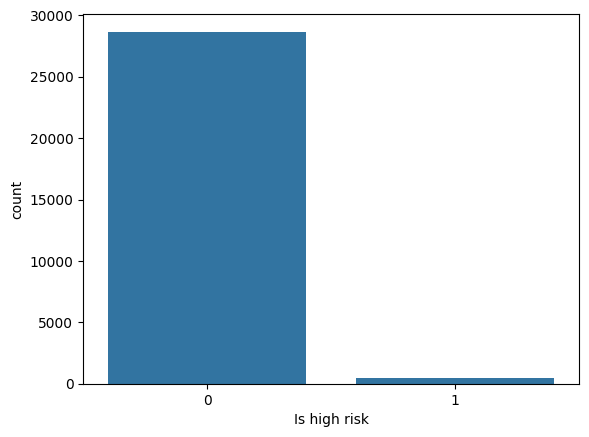

In [ ]:
# Univariate Analysis
print(train_data.describe())# Display summary statistics
print(train_data.info())# Display basic information about the dataset

# Bivariate Analysis
# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Is high risk', data=train_data)
plt.show()


In [ ]:
# Example: Convert categorical variables into numerical representations
train_data['Gender'] = train_data['Gender'].map({'F': 0, 'M': 1})

# Example: Handling missing values
train_data.fillna(train_data.mean(), inplace=True)

# Example: Encoding categorical variables
train_data = pd.get_dummies(train_data, columns=['Education level', 'Marital status'])


<ipython-input-3-c192f49a57a5>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = train_data.drop(columns=['ID', 'Is high risk'])
y = train_data['Is high risk']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables using one-hot encoding for both training and validation sets
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)


In [ ]:
# Check data types
print(X_train.dtypes)

# Check for missing values
print(X_train.isnull().sum())

# Check data shape
print(X_train.shape)


Gender                                             int64
Has a car                                         object
Has a property                                    object
Children count                                     int64
Income                                           float64
Employment status                                 object
Dwelling                                          object
Age                                                int64
Employment length                                  int64
Has a mobile phone                                 int64
Has a work phone                                   int64
Has a phone                                        int64
Has an email                                       int64
Job title                                         object
Family member count                              float64
Account age                                      float64
Education level_Academic degree                    uint8
Education level_Higher educatio

In [ ]:
# Encode categorical variables using one-hot encoding
X_train_encoded = pd.get_dummies(X_train, columns=['Has a car', 'Has a property', 'Employment status', 'Dwelling', 'Job title'])
# Check data types after encoding
print(X_train_encoded.dtypes)


Gender                                             int64
Children count                                     int64
Income                                           float64
Age                                                int64
Employment length                                  int64
Has a mobile phone                                 int64
Has a work phone                                   int64
Has a phone                                        int64
Has an email                                       int64
Family member count                              float64
Account age                                      float64
Education level_Academic degree                    uint8
Education level_Higher education                   uint8
Education level_Incomplete higher                  uint8
Education level_Lower secondary                    uint8
Education level_Secondary / secondary special      uint8
Marital status_Civil marriage                      uint8
Marital status_Married         

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()

# Train models
logistic_regression.fit(X_train_encoded, y_train)
decision_tree.fit(X_train_encoded, y_train)
random_forest.fit(X_train_encoded, y_train)
gradient_boosting.fit(X_train_encoded, y_train)

from sklearn.metrics import classification_report

# Predictions on validation set
logistic_regression_preds = logistic_regression.predict(X_val_encoded)
decision_tree_preds = decision_tree.predict(X_val_encoded)
random_forest_preds = random_forest.predict(X_val_encoded)
gradient_boosting_preds = gradient_boosting.predict(X_val_encoded)

# Evaluate model performance
print("Logistic Regression:")
print(classification_report(y_val, logistic_regression_preds))

print("Decision Tree:")
print(classification_report(y_val, decision_tree_preds))

print("Random Forest:")
print(classification_report(y_val, random_forest_preds))

print("Gradient Boosting:")
print(classification_report(y_val, gradient_boosting_preds))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5747
           1       0.00      0.00      0.00        86

    accuracy                           0.99      5833
   macro avg       0.49      0.50      0.50      5833
weighted avg       0.97      0.99      0.98      5833

Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5747
           1       0.20      0.24      0.22        86

    accuracy                           0.97      5833
   macro avg       0.59      0.61      0.60      5833
weighted avg       0.98      0.97      0.98      5833

Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5747
           1       0.31      0.12      0.17        86

    accuracy                           0.98      5833
   macro avg       0.65      0.56      0.58      5833
weighted avg       0.98

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Data Preprocessing: Encode categorical variables
X_train_encoded = pd.get_dummies(X_train)
X_val_encoded = pd.get_dummies(X_val)

# Train Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_encoded, y_train)


LogisticRegression()

**Exploratory Data Analysis (EDA)**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

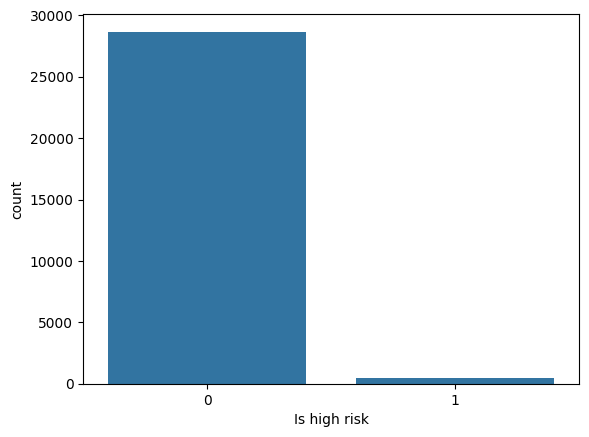

In [ ]:
import pandas as pd

# Load the training data
train_data = pd.read_csv("train_data.csv")

# Display basic information about the dataset
print(train_data.info())

# Display summary statistics
print(train_data.describe())

# Visualize the distribution of the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Is high risk', data=train_data)
plt.show()


**Data Preprocessing**

In [ ]:
# Handle missing values (assuming filling missing numerical values with mean and categorical with mode)
train_data.fillna(train_data.mean(), inplace=True)
train_data.fillna(train_data.mode().iloc[0], inplace=True)

# Encode categorical variables using one-hot encoding
train_data = pd.get_dummies(train_data)

# Separate features and target variable
X = train_data.drop(columns=['ID', 'Is high risk'])
y = train_data['Is high risk']


<ipython-input-17-ea64ad7946af>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)


**Machine Learning Model Development**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the validation set
y_pred = rf_classifier.predict(X_val)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_val, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("ROC AUC Score:", roc_auc_score(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5747
           1       0.30      0.10      0.16        86

    accuracy                           0.98      5833
   macro avg       0.64      0.55      0.57      5833
weighted avg       0.98      0.98      0.98      5833

Confusion Matrix:
[[5726   21]
 [  77    9]]
ROC AUC Score: 0.5504985412004645


**Prediction for Credit card Approval**

*Krupa Maru (MIP-ML-04)*

**Predicting Credit Card Approval**

In [ ]:
import pandas as pd

# Load the test data
test_data = pd.read_csv("test_data.csv")

# Display basic information about the test dataset
print(test_data.info())

# Display summary statistics of the test dataset
print(test_data.describe())

# Preprocess the test data (handling missing values and encoding categorical variables)
test_data.fillna(test_data.mean(), inplace=True)  # Fill missing numerical values with mean
test_data.fillna(test_data.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode
test_data = pd.get_dummies(test_data)  # One-hot encode categorical variables

# Display preprocessed test data
print(test_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

<ipython-input-20-f95a7a68426e>:13: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)  # Fill missing numerical values with mean


In [ ]:
# Make predictions on the test data using the trained model
test_predictions = rf_classifier.predict(test_data.drop(columns=['ID', 'Is high risk']))

# Display the predicted values
print(test_predictions)


[0 0 0 ... 0 0 0]


**Prediction for Credit card Approval**

*Krupa Maru (MIP-ML-04)*